In [ ]:
#not using

# def free(npts):
#     "Free particle."
#     return np.zeros(npts)

# def step(npts,v0):
#     "Potential step"
#     v = free(npts)
#     v[int(npts/2):] = v0
#     return v

# def barrier(npts,v0,thickness):
#     "Barrier potential"
#     v = free(npts)
#     v[int(npts/2):int(npts/2)+thickness] = v0
#     return v

# def well(npts,v0):
#     "Well potential"
#     v = np.full(npts, -v0)
# #     v[int(npts/2):int(npts/2)+10*thickness] = -v0
#     return v

# def fillax(x,y,*args,**kw):
#     """Fill the space between an array of y values and the x axis.
#     All args/kwargs are passed to the pylab.fill function.
#     Returns the value of the pylab.fill() call.
#     """
#     xx = np.concatenate((x,np.array([x[-1],x[0]],x.dtype)))
#     yy = np.concatenate((y,np.zeros(2,y.dtype)))
#     return plt.fill(xx, yy, *args,**kw)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import datetime
from tqdm import tqdm
import os
import winsound

#https://scipy-cookbook.readthedocs.io/items/SchrodingerFDTD.html
# Set pylab to interactive mode so plots update when run outside ipython
# pylab.ion()
#=============================================================================
# Utility functions
#  Defines a quick Gaussian pulse function to act as an envelope to the 
#  function.

def free(npts):
    "Free particle."
    return np.zeros(npts)

def Gaussian(x,t,sigma):
    """  A Gaussian curve.
        x = Variable
        t = time shift
        sigma = standard deviation      """
    return np.exp(-(x-t)**2/(2*sigma**2))

def coulomb(npts):
    "Coulomb potential"
    v = np.linspace(0.15,npts,npts)
    return -1/v

def dispersionForce(x, alpha, C):
    "dispersionForce U=1/x^alpha"
#     v = np.linspace(0.3,npts,npts)
    return -C/x**alpha

# def eff(npts, l, m):
#     "effective potential"
#     x = np.linspace(0.1, npts, npts)
#     calculator = lambda t: (l*(l+1)*hbar**2)/(2*m*t**2)
#     v = np.array([calculator(xi) for xi in x])
#     return v

def eff(x, l, m):
    "effective potential"
    calculator = lambda t: (l*(l+1)*hbar**2)/(2*m*t**2)
    v = np.array([calculator(xi) for xi in x])
    return v

| / | M[a.u] | C3[a.u] | C4[a.u] |
|----|--------|--------|------|
| He | 7296   | 1.9009 | 5163 |
| Na | 41908  | 1.889  | 1417 |
| Rb | 155798 | 0.733  | 1170 |
| X | 1 | 1  | 1 |


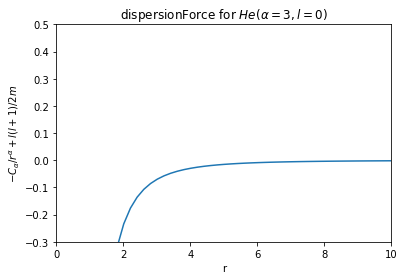

In [2]:
dx   = 1.0e0    #  Spatial resolution
N    = 1200     #  Number of spatial points.
hbar = 1.0e0    #  Plank's constant
particle = 'He'
alpha = 3
l = 0

particles = {
    'He': {'M':7296, 'C3': 1.9009, 'C4': 5163},
    'Na': {'M':41908, 'C3': 1.889, 'C4': 1417},
    'Rb': {'M':155798, 'C3': 0.733, 'C4': 1170},
    'X': {'M':1, 'C3': 1, 'C4': 1},
}

magicNum = 5
d_today = datetime.date.today()

X = dx*np.linspace(0.01,N,N*magicNum)
V = dispersionForce(X, alpha, particles[particle]['C'+str(alpha)]) + eff(X,l, particles[particle]['M'])

POTENTIAL = 'dispersionForce'
plt.plot(X, V)
plt.xlim(0,10)
plt.xlabel('r')
plt.ylim(-0.3,0.5)
plt.ylabel(r'$-C_{\alpha}/r^\alpha + l(l+1)/2m$')
plt.title('dispersionForce for '+r'${}(\alpha={},l={})$'.format(particle, alpha, l))
plt.savefig('potential/{}-{}-alpha-{}-l-{}-particle-{}.png'.format(d_today, POTENTIAL, alpha, l, particle))
plt.show()

x0= 400.0
-1.0048763401559454e-09
[-1.90088629e+03 -1.42514147e+00 -2.04787998e-01 ... -1.01008087e-09
 -1.00747419e-09 -1.00487634e-09]
c2V len =  1200
動径方向のOne-dimensional Schrodinger equation - time evolution
Wavepacket energy:    1.7123431334103203e-06
Potential type:       dispersionForce


  5%|███▊                                                                           | 58/1201 [00:00<00:01, 579.84it/s]C:\Users\reg\Anaconda3\lib\site-packages\ipykernel_launcher.py:164: RuntimeWarning: overflow encountered in multiply
C:\Users\reg\Anaconda3\lib\site-packages\ipykernel_launcher.py:169: RuntimeWarning: overflow encountered in multiply
C:\Users\reg\Anaconda3\lib\site-packages\ipykernel_launcher.py:169: RuntimeWarning: invalid value encountered in add
C:\Users\reg\Anaconda3\lib\site-packages\ipykernel_launcher.py:168: RuntimeWarning: invalid value encountered in add
100%|█████████████████████████████████████████████████████████████████████████████| 1201/1201 [00:01<00:00, 671.90it/s]


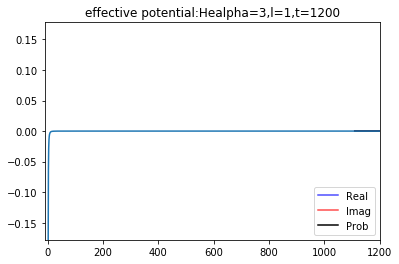

In [27]:
#=============================================================================
#
#  Simulation Constants.  Be sure to include decimal points on appropriate
#  variables so they become floats instead of integers.
#
m = particles[particle]['M']
particle = 'He'
magicNum = 1

POTENTIAL = 'dispersionForce'

T    = int(1*N*magicNum)      #  Number of time steps.  5*N is a nice value for terminating
               #  before anything reaches the boundaries.
Tp   = 50       #  Number of time steps to increment before updating the plot.
l = 1
alpha = 3
X    = dx*np.linspace(0.1,N,N*magicNum)        #  Spatial axis.
xn = range(0,int(N*magicNum))
x = X[xn]/dx    #  Normalized position coordinate

# Potential parameters.  By playing with the type of potential and the height
# and thickness (for barriers), you'll see the various transmission/reflection
# regimes of quantum mechanical tunneling.
#V0   = 1.0e-2   #  Potential amplitude (used for steps and barriers)
#THCK = 15       # "Thickness" of the potential barrier (if appropriate
                # V-function is chosen)
# Uncomment the potential type you want to use here:
# Zero potential, packet propagates freely.
#POTENTIAL = 'free'
# Potential step.  The height (V0) of the potential chosen above will determine
# the amount of reflection/transmission you'll observe
# Potential barrier.  Note that BOTH the potential height (V0) and thickness
# of the barrier (THCK) affect the amount of tunneling vs reflection you'll
# observe.
#POTENTIAL = 'barrier'
#  Initial wave function constants
sigma = 40.0 # Standard deviation on the Gaussian envelope (remember Heisenberg
             #  uncertainty).
x0 = round(N/2) - 5*sigma # Time shift
print('x0=',x0)
# k0 = np.pi/20 # Wavenumber (note that energy is a function of k)
k0 = np.pi/20
# Energy for a localized gaussian wavepacket interacting with a localized
# potential (so the interaction term can be neglected by computing the energy
# integral over a region where V=0)
E = (hbar**2/2.0/m)*(k0**2+0.5/sigma**2)
#=============================================================================
# Code begins
#
# You shouldn't need to change anything below unless you want to actually play
# with the numerical algorithm or modify the plotting.
#
#  Fill in the appropriate potential function (is there a Python equivalent to
#  the SWITCH statement?).

if POTENTIAL=='free':
    V = free(N*magicNum)
elif POTENTIAL=='step':
    V = step(N,V0)
elif POTENTIAL=='barrier':
    V = barrier(N,V0,THCK)
elif POTENTIAL=='well':
    V = well(N,V0)
elif POTENTIAL=='coulomb':
    V = coulomb(N*magicNum) + eff(N*magicNum,l,particles['X']['M'])
elif POTENTIAL=='dispersionForce':
    V = dispersionForce(x, alpha, particles[particle]['C'+str(alpha)]) + eff(x,1, particles[particle]['M'])
else:
    raise ValueError("Unrecognized potential type: %s" % POTENTIAL)
    
#  More simulation parameters.  The maximum stable time step is a function of
#  the potential, V.
Vmax = V.max()   #  Maximum potential of the domain.
print(V.max())
Vmax = 1
print(V)
dt   = hbar/(2*hbar**2/(m*dx**2)+Vmax)         #  Critical time step.
c1   = hbar*dt/(m*dx**2)                       #  Constant coefficient 1.
c2   = 2*dt/hbar                               #  Constant coefficient 2.
c2V  = c2*V  # pre-compute outside of update loop
print('c2V len = ', len(c2V))
# Print summary info
print('動径方向のOne-dimensional Schrodinger equation - time evolution')
print('Wavepacket energy:   ',E)
print('Potential type:      ',POTENTIAL)
# print('Potential height V0: ',V0)
# print('Barrier thickness:   ',THCK)
#  Wave functions.  Three states represent past, present, and future.
psi_r = np.zeros((3,N*magicNum))#  Real
psi_i = np.zeros((3,N*magicNum)) #  Imaginary
psi_p = np.zeros(N,)   # Observable probability (magnitude-squared
                          #  of the complex wave function).
#  Temporal indexing constants, used for accessing rows of the wavefunctions.
PA = 0                 #  Past
PR = 1                 #  Present
FU = 2                 #  Future
#  Initialize wave function.  A present-only state will "split" with half the
#  wave function propagating to the left and the other half to the right.
#  Including a "past" state will cause it to propagate one way.

gg = Gaussian(x,x0,sigma)
cx = np.cos(-k0*x)
sx = np.sin(-k0*x)
psi_r[PR,xn] = cx*gg
psi_i[PR,xn] = sx*gg
psi_r[PA,xn] = cx*gg
psi_i[PA,xn] = sx*gg
# Initial normalization of wavefunctions
#   Compute the observable probability.
psi_p = psi_r[PR]**2 + psi_i[PR]**2
#  Normalize the wave functions so that the total probability in the simulation
#  is equal to 1.
P   = dx * psi_p.sum()                      #  Total probability.
nrm = np.sqrt(P)
psi_r /= nrm
psi_i /= nrm
psi_p /= P
#  Initialize the figure and axes.
plt.figure()
xmin = X.min()
xmax = X.max()
ymax = 1.5*(psi_r[PR]).max()
plt.axis([xmin,xmax,-ymax,ymax])
#  Initialize the plots with their own line objects.  The figures plot MUCH
#  faster if you simply update the lines as opposed to redrawing the entire
#  figure.  For reference, include the potential function as well.
lineR, = plt.plot(X,psi_r[PR],'b',alpha=0.7,label='Real')
lineI, = plt.plot(X,psi_i[PR],'r',alpha=0.7,label='Imag')
lineP, = plt.plot(X,6*psi_p,'k',label='Prob')
plt.title('effective potential:{}alpha={},l={},t={}'.format(particle,alpha,l,T))
# For non-zero potentials, plot them and shade the classically forbidden region
# in light red, as well as drawing a green line at the wavepacket's total
# energy, in the same units the potential is being plotted.

# if Vmax !=0 :
#     # Scaling factor for energies, so they fit in the same plot as the
#     # wavefunctions
#     Efac = ymax/2.0/Vmax
#     V_plot = V*Efac
#     plt.plot(X,V_plot,':k',zorder=0)   #  Potential line.
#     fillax(X,V_plot, facecolor='y', alpha=0.2,zorder=0)
#     # Plot the wavefunction energy, in the same scale as the potential
#     plt.axhline(E*Efac,color='g',label='Energy',zorder=1)
        
plt.legend(loc='lower right')
plt.draw()
# I think there's a problem with pylab, because it resets the xlim after
# plotting the E line.  Fix it back manually.
plt.xlim(xmin-10,xmax)
#  Direct index assignment is MUCH faster than using a spatial FOR loop, so
#  these constants are used in the update equations.  Remember that Python uses
#  zero-based indexing.
IDX1 = range(1,N*magicNum-1)                            #  psi [ k ]
IDX2 = range(2,N*magicNum)                              #  psi [ k + 1 ]
IDX3 = range(0,N*magicNum-2)                            #  psi [ k - 1 ]
for t in tqdm(range(T+1)):
    # Precompute a couple of indexing constants, this speeds up the computation
    psi_rPR = psi_r[PR]
    psi_iPR = psi_i[PR]
    #  Apply the update equations.
    psi_i[FU,IDX1] = psi_i[PA,IDX1] + \
                      c1*(psi_rPR[IDX2] - 2*psi_rPR[IDX1] +
                          psi_rPR[IDX3])
    psi_i[FU] -= c2V*psi_r[PR]

    psi_r[FU,IDX1] = psi_r[PA,IDX1] - \
                      c1*(psi_iPR[IDX2] - 2*psi_iPR[IDX1] +
                          psi_iPR[IDX3])
    psi_r[FU] += c2V*psi_i[PR]
    #  Increment the time steps.  PR -> PA and FU -> PR
    psi_r[PA] = psi_rPR
    psi_r[PR] = psi_r[FU]
    psi_i[PA] = psi_iPR
    psi_i[PR] = psi_i[FU]
    #  Only plot after a few iterations to make the simulation run faster.
    if t % Tp == 0:
        #  Compute observable probability for the plot.
        psi_p = psi_r[PR]**2 + psi_i[PR]**2
        #  Update the plots.
        lineR.set_ydata(psi_r[PR])
        lineI.set_ydata(psi_i[PR])
        # Note: we plot the probability density amplified by a factor so it's a
        # bit easier to see.
        lineP.set_ydata(6*psi_p)
    
        plt.draw()
# So the windows don't auto-close at the end if run outside ipython
# pylab.ioff()
# plt.ylim(-0.05,0.05)aaaaa
plt.plot(X,V)

try:
    os.mkdir(str(d_today))
except:
    pass

if POTENTIAL == 'dispersionForce':
    plt.savefig('{}/{}-{}-{}-alpha={}-l={}-t={}.png'.format(d_today, d_today, POTENTIAL, particle, alpha, l, T))
else:
    plt.savefig('{}/{}-{}-{}-alpha={}-l={}-t={}.png'.format(d_today, d_today, POTENTIAL, particle, alpha, l, T))
# plt.xlim(0,200)
plt.show()
winsound.Beep(500, 1000)

In [336]:
print(d_today)
print('c2V=',c2V)
print('lenght c2V=',len(c2V))
psi_p = psi_r[PR]**2 + psi_i[PR]**2
        #  Update the plots.
lineR.set_ydata(psi_r[PR])
lineI.set_ydata(psi_i[PR])
        # Note: we plot the probability density amplified by a factor so it's a
        # bit easier to see.
lineP.set_ydata(6*psi_p)

plt.draw()
np.delete(psi_p, 11999)
plt.plot(x,np.delete(psi_p, 11999))
plt.ylim(-0.05,0.05)
# plt.show()


print(T)
# print(len(psi_p))

2020-07-05
c2V= [-3.73134212e+02 -8.27254093e-01 -1.26585395e-01 ... -8.85594211e-11
 -8.84475301e-11 -8.83358265e-11]
lenght c2V= 2400


IndexError: index 11999 is out of bounds for axis 0 with size 2400

<Figure size 432x288 with 0 Axes>

x0= 400.0


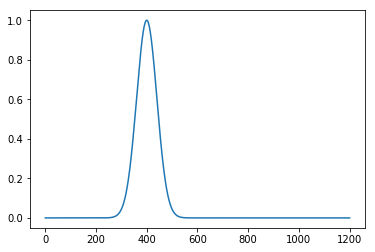

In [188]:
dx = 1
magicNum = 10
N = 1200

x0 = round(N/2) - 5*sigma # Time shift

print('x0=',x0)
X    = dx*np.linspace(0.01,N,N*magicNum)        #  Spatial axis.
xn = range(1,int(N*magicNum))
x = X[xn]/dx    #  Normalized position coordinate

gg = Gaussian(x,x0,sigma)
plt.plot(x,gg)

In [183]:
print(V.max())

0.0


In [24]:
import csv

with open('c2v.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(c2V)

TypeError: 'MovieWriterRegistry' object is not an iterator

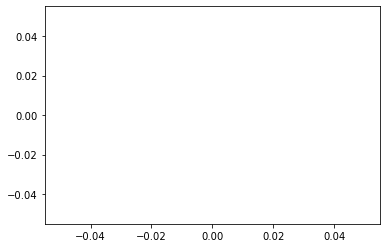

In [34]:
import matplotlib.animation as animation

images = []
fig = plt.figure()

for j in np.arange(50,T, 100):
    for t in range(T+1):
        # Precompute a couple of indexing constants, this speeds up the computation
        psi_rPR = psi_r[PR]
        psi_iPR = psi_i[PR]
        #  Apply the update equations.
        psi_i[FU,IDX1] = psi_i[PA,IDX1] + \
                          c1*(psi_rPR[IDX2] - 2*psi_rPR[IDX1] +
                              psi_rPR[IDX3])
        psi_i[FU] -= c2V*psi_r[PR]

        psi_r[FU,IDX1] = psi_r[PA,IDX1] - \
                          c1*(psi_iPR[IDX2] - 2*psi_iPR[IDX1] +
                              psi_iPR[IDX3])
        psi_r[FU] += c2V*psi_i[PR]
        #  Increment the time steps.  PR -> PA and FU -> PR
        psi_r[PA] = psi_rPR
        psi_r[PR] = psi_r[FU]
        psi_i[PA] = psi_iPR
        psi_i[PR] = psi_i[FU]
        #  Only plot after a few iterations to make the simulation run faster.
        if t % Tp == 0:
            #  Compute observable probability for the plot.
            psi_p = psi_r[PR]**2 + psi_i[PR]**2
            #  Update the plots.
            lineR.set_ydata(psi_r[PR])
            lineI.set_ydata(psi_i[PR])
            # Note: we plot the probability density amplified by a factor so it's a
            # bit easier to see.
            lineP.set_ydata(6*psi_p)

            im = plt.plot()
            images.append(im)

ani = animation.ArtistAnimation(fig, images, interval=100)
ani.save("output.gif", writer="imagemagick")

[1.00000000e-01 1.10075063e+00 2.10150125e+00 ... 1.19799850e+03
 1.19899925e+03 1.20000000e+03]


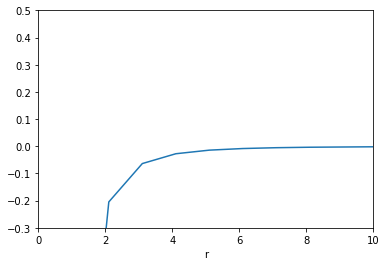

In [38]:
import numpy as np
from matplotlib import pyplot as plt

def dispersionForce(x, alpha, C):
    "dispersionForce U=1/x^alpha"
    return -C/x**alpha

N = 1200
alpha = 3
C = 1.9009
dx = 10
magicNum = 1
X    = dx*np.linspace(0.1,N,N*magicNum)
xn = range(0,int(N*magicNum))

x = X[xn]/dx    #  Normalized position coordinate
print(x)
plt.xlim(0,10)
plt.xlabel('r')
plt.ylim(-0.3,0.5)
plt.plot(x,dispersionForce(x, alpha, C))

In [22]:
arr1 = np.array([0,1,2,3])

arr1[4] = 3

IndexError: index 4 is out of bounds for axis 0 with size 4